# Import the necessary libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the CSV File
df = pd.read_csv(r"/content/Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df['size'].value_counts()

,count
size,
2 BHK,5199
3 BHK,4310
4 Bedroom,826
4 BHK,591
3 Bedroom,547
1 BHK,538
2 Bedroom,329
5 Bedroom,297
6 Bedroom,191


In [6]:
df['bath'].value_counts()

,count
bath,
2.0,6908
3.0,3286
4.0,1226
1.0,788
5.0,524
6.0,273
7.0,102
8.0,64
9.0,43


In [7]:
df['balcony'].value_counts()

,count
balcony,
2.0,5113
1.0,4897
3.0,1672
0.0,1029


In [8]:
df['total_sqft'].value_counts()

,count
total_sqft,
1200,843
1100,221
1500,205
2400,196
600,180
1000,172
1350,133
1050,123
1300,117


In [9]:
def extract_int_size(text):
    if isinstance(text, str):  # Check if text is a string
        # Using regular expression to find first sequence of digits
        match = re.search(r'\d+', text)
        if match:
            return int(match.group())  # Convert matched digits to integer
    return None  # Return None for non-string or when no digits found

# Apply function to extract integer size
df['size'] = df['size'].apply(extract_int_size)

In [10]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,NaN,1200,2.0,1.0,51.00


In [11]:
def extract_integer(value):

    match = re.search(r'\d+', str(value))
    if match:
        return int(match.group())
    else:
        return None

df['total_sqft'] = df['total_sqft'].apply(extract_integer)

In [12]:
df.shape

(13320, 9)

In [13]:
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,NaN,1440,2.0,3.0,62.00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  float64
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  int64  
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 936.7+ KB


In [15]:
df.describe()

,size,total_sqft,bath,balcony,price
count,13304.000000,13320.000000,13247.000000,12711.000000,13320.000000
mean,2.803743,1552.947072,2.692610,1.584376,112.565627
std,1.294974,1236.591541,1.341458,0.817263,148.971674
min,1.000000,1.000000,1.000000,0.000000,8.000000
25%,2.000000,1100.000000,2.000000,1.000000,50.000000
50%,3.000000,1274.000000,2.000000,2.000000,72.000000
75%,3.000000,1675.000000,3.000000,2.000000,120.000000
max,43.000000,52272.000000,40.000000,3.000000,3600.000000


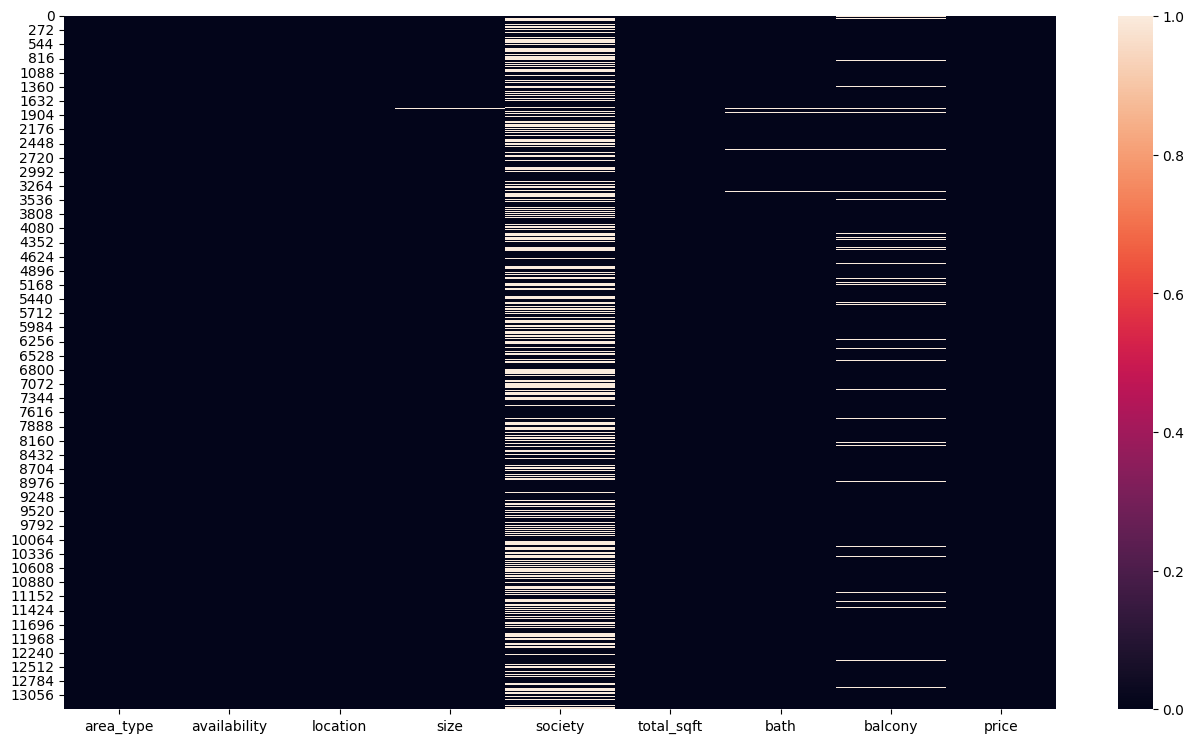

In [16]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.show()

In [17]:
df.isnull().sum()/ len(df) * 100

,0
area_type,0.000000
availability,0.000000
location,0.007508
size,0.120120
society,41.306306
total_sqft,0.000000
bath,0.548048
balcony,4.572072
price,0.000000


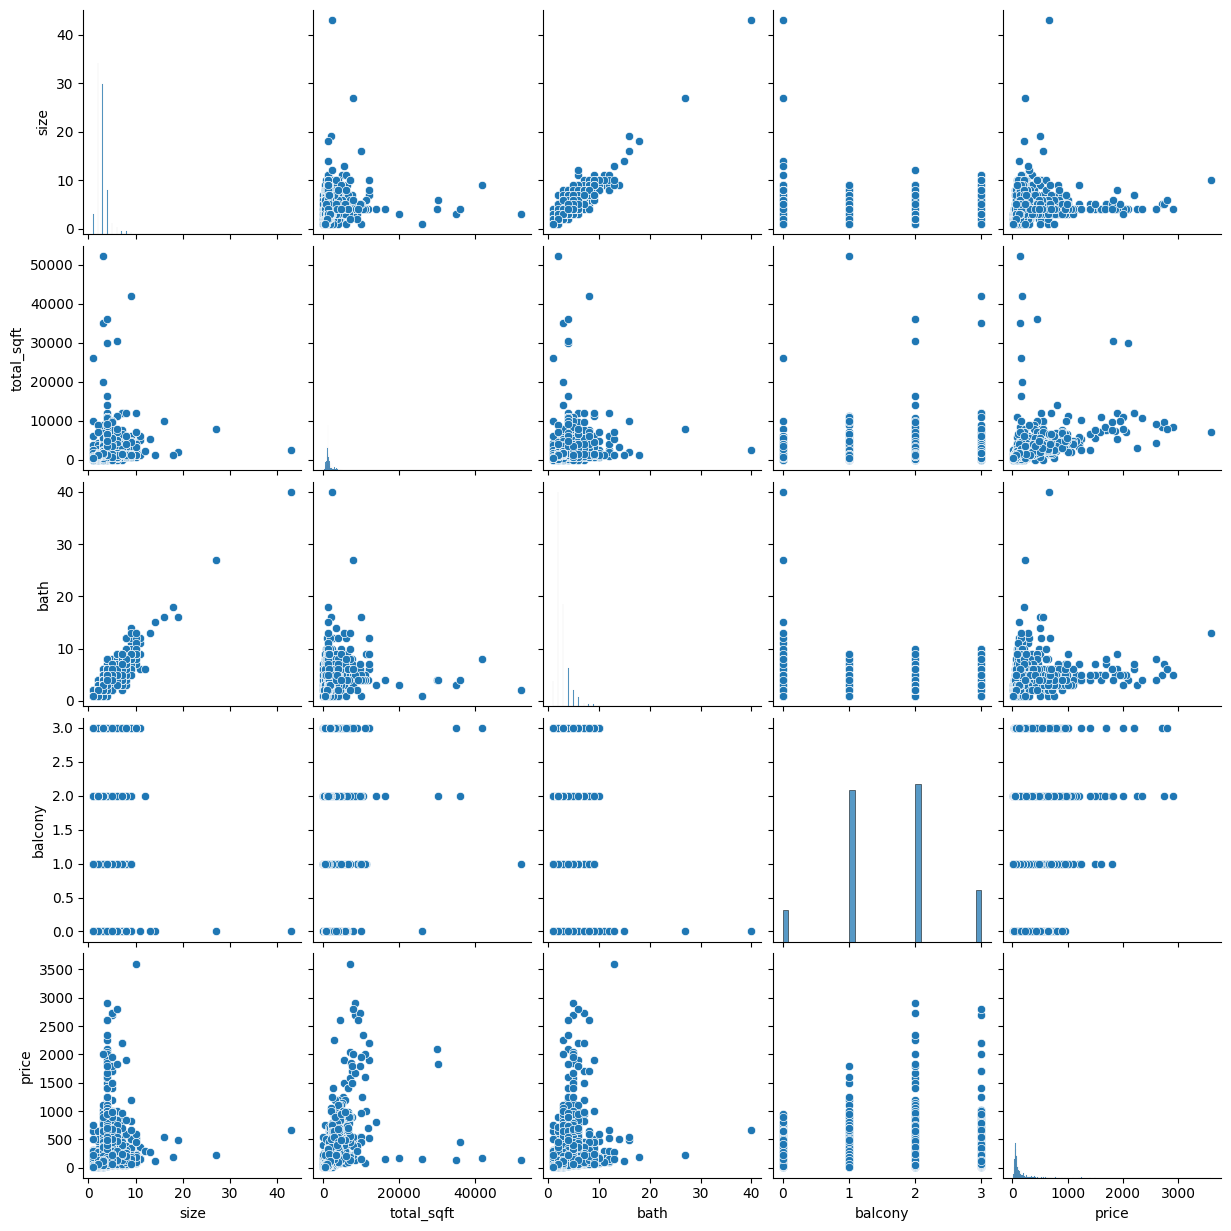

In [18]:
sns.pairplot(df)

In [19]:
# Drop columns safely (ignore if they don’t exist)
df.drop(columns=['society', 'area_type', 'availability', 'location'], errors='ignore', inplace=True)

# Fill missing values in numeric columns
df['bath'].fillna(df['bath'].median(), inplace=True)
df['balcony'].fillna(df['balcony'].median(), inplace=True)
df['size'].fillna(df['size'].median(), inplace=True)


In [20]:
df.duplicated().sum()

np.int64(1637)

In [21]:
# Drop Duplicate Rows
df.drop_duplicates(inplace=True)

In [22]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')  # works fine with latest Matplotlib


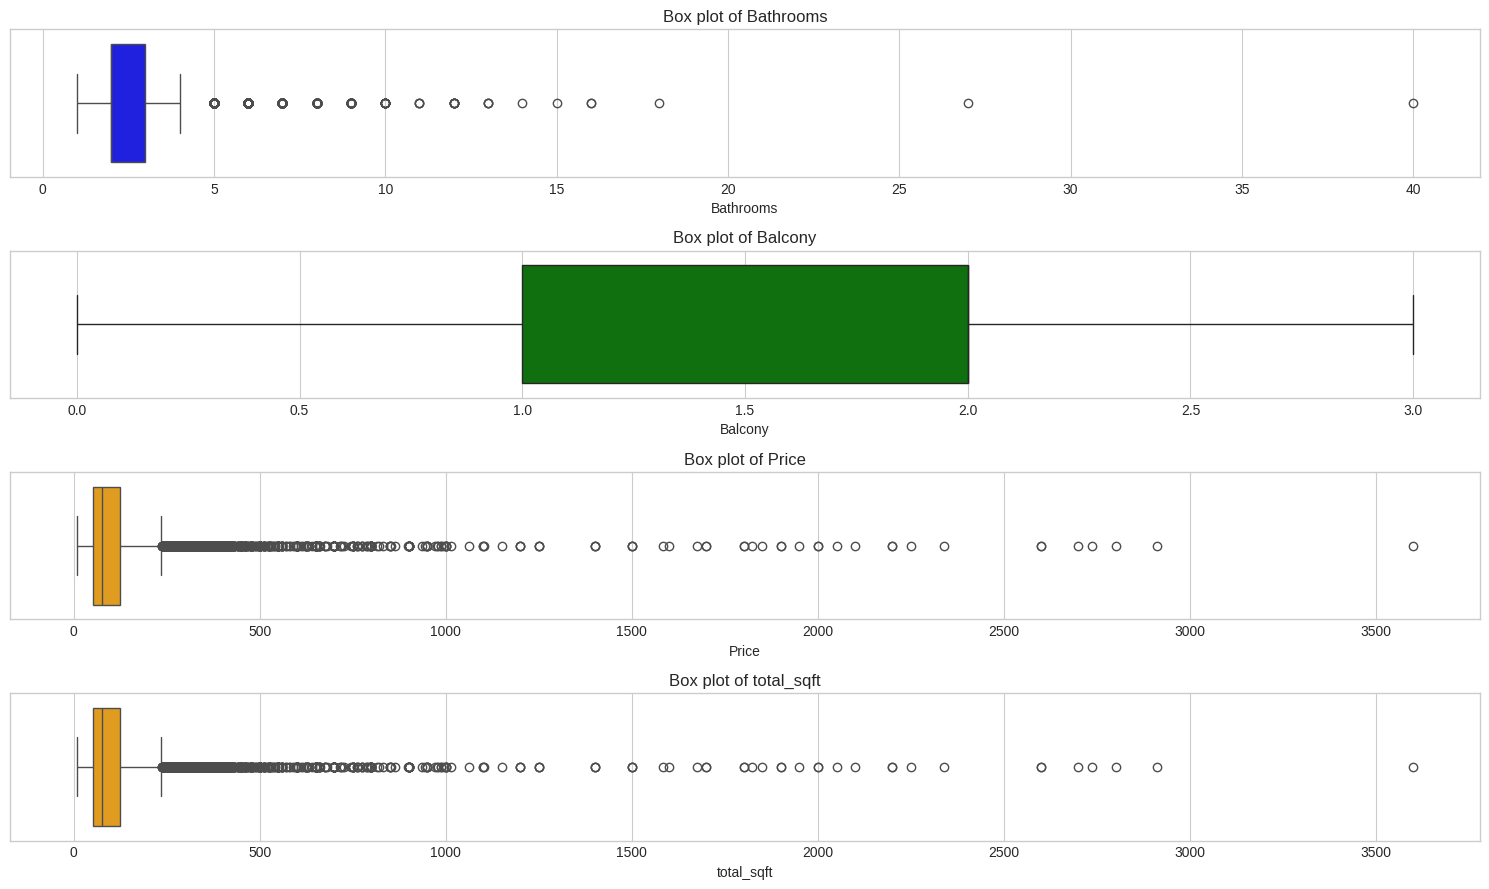

In [23]:
# Create subplots for each variable
plt.figure(figsize=(15, 9))

# Box plot for 'bath'
plt.subplot(4, 1, 1)
sns.boxplot(x='bath', data=df, color='blue', orient='v')
plt.title('Box plot of Bathrooms')
plt.xlabel('Bathrooms')

# Box plot for 'balcony'
plt.subplot(4, 1, 2)
sns.boxplot(x='balcony', data=df, color='green', orient='v')
plt.title('Box plot of Balcony')
plt.xlabel('Balcony')

# Box plot for 'price'
plt.subplot(4, 1, 3)
sns.boxplot(x='price', data=df, color='orange', orient='v')
plt.title('Box plot of Price')
plt.xlabel('Price')

# Box plot for 'total_sqft'
plt.subplot(4, 1, 4)
sns.boxplot(x='price', data=df, color='orange', orient='v')
plt.title('Box plot of total_sqft')
plt.xlabel('total_sqft')

plt.tight_layout()
plt.show()


In [24]:
# Calculate quartiles and IQR for each column
Q1_bath = df['bath'].quantile(0.25)
Q3_bath = df['bath'].quantile(0.75)
IQR_bath = Q3_bath - Q1_bath

Q1_balcony = df['balcony'].quantile(0.25)
Q3_balcony = df['balcony'].quantile(0.75)
IQR_balcony = Q3_balcony - Q1_balcony

Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_total_sqft = df['total_sqft'].quantile(0.25)  # Calculate Q1 for total_sqft
Q3_total_sqft = df['total_sqft'].quantile(0.75)  # Calculate Q3 for total_sqft
IQR_total_sqft = Q3_total_sqft - Q1_total_sqft   # Calculate IQR for total_sqft

# Define upper and lower bounds to filter outliers
lower_bound_bath = Q1_bath - 1.5 * IQR_bath
upper_bound_bath = Q3_bath + 1.5 * IQR_bath

lower_bound_balcony = Q1_balcony - 1.5 * IQR_balcony
upper_bound_balcony = Q3_balcony + 1.5 * IQR_balcony

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

lower_bound_total_sqft = Q1_total_sqft - 1.5 * IQR_total_sqft  # Define lower bound for total_sqft
upper_bound_total_sqft = Q3_total_sqft + 1.5 * IQR_total_sqft  # Define upper bound for total_sqft

# Filter rows where values are within the defined bounds
df_filtered = df[
    (df['bath'] >= lower_bound_bath) & (df['bath'] <= upper_bound_bath) &
    (df['balcony'] >= lower_bound_balcony) & (df['balcony'] <= upper_bound_balcony) &
    (df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price) &
    (df['total_sqft'] >= lower_bound_total_sqft) & (df['total_sqft'] <= upper_bound_total_sqft)
]

# Display the shape of the filtered DataFrame
print("Shape of filtered DataFrame:", df_filtered.shape)

Shape of filtered DataFrame: (9703, 5)


In [25]:
import seaborn as sns
sns.set_theme(style="whitegrid")  # replaces old seaborn-whitegrid style


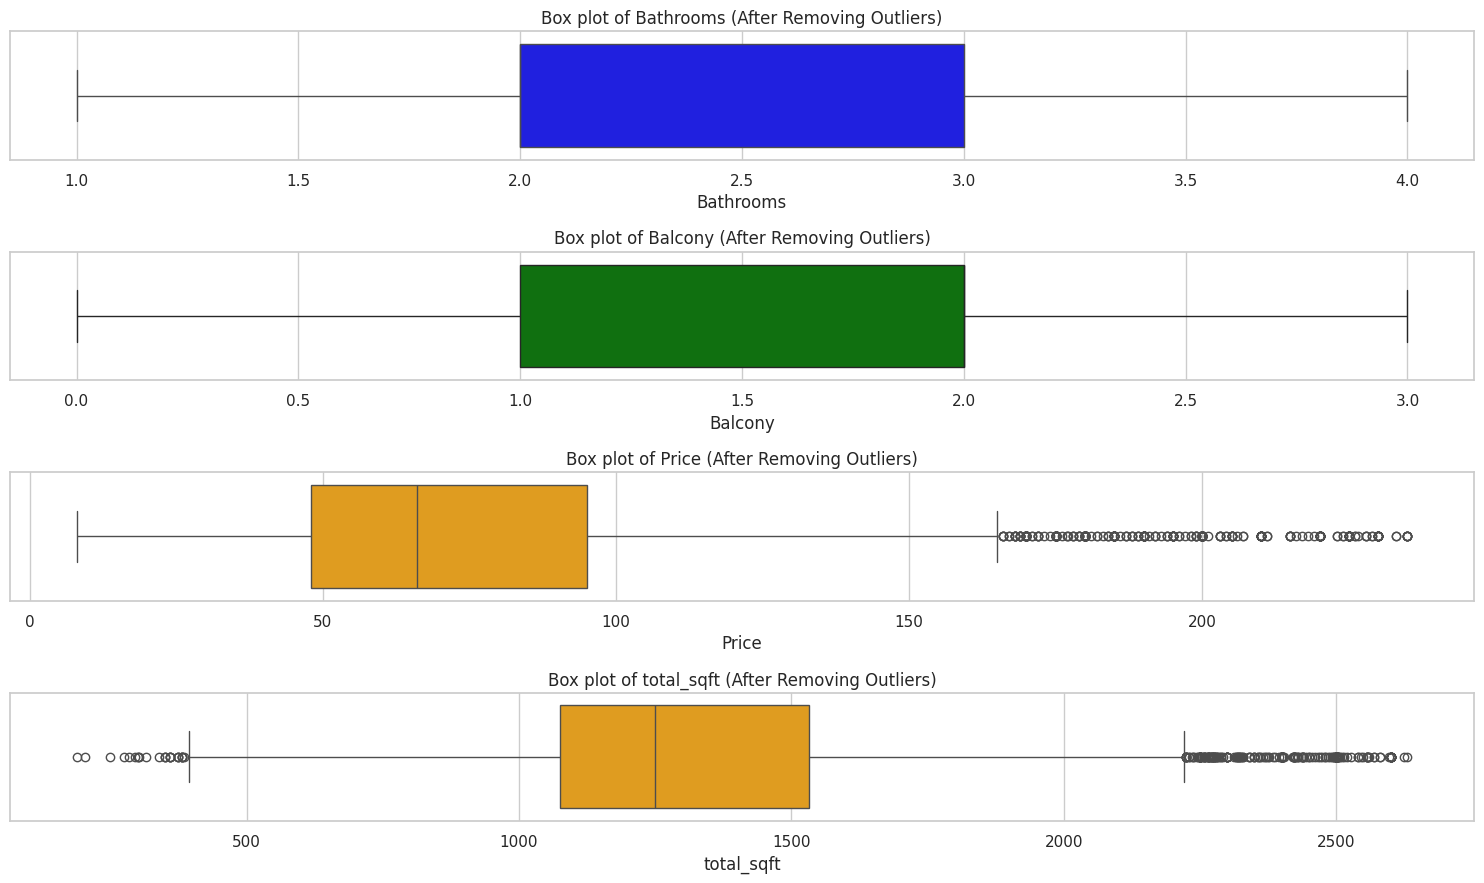

In [26]:
# Create subplots for each variable
plt.figure(figsize=(15, 9))

# Box plot for 'bath' after removing outliers
plt.subplot(4, 1, 1)
sns.boxplot(x='bath', data=df_filtered, color='blue', orient='v')
plt.title('Box plot of Bathrooms (After Removing Outliers)')
plt.xlabel('Bathrooms')

# Box plot for 'balcony' after removing outliers
plt.subplot(4, 1, 2)
sns.boxplot(x='balcony', data=df_filtered, color='green', orient='v')
plt.title('Box plot of Balcony (After Removing Outliers)')
plt.xlabel('Balcony')

# Box plot for 'price' after removing outliers
plt.subplot(4, 1, 3)
sns.boxplot(x='price', data=df_filtered, color='orange', orient='v')
plt.title('Box plot of Price (After Removing Outliers)')
plt.xlabel('Price')

# Box plot for 'total_sqft' after removing outliers
plt.subplot(4, 1, 4)
sns.boxplot(x='total_sqft', data=df_filtered, color='orange', orient='v')
plt.title('Box plot of total_sqft (After Removing Outliers)')
plt.xlabel('total_sqft')

plt.tight_layout()
plt.show()

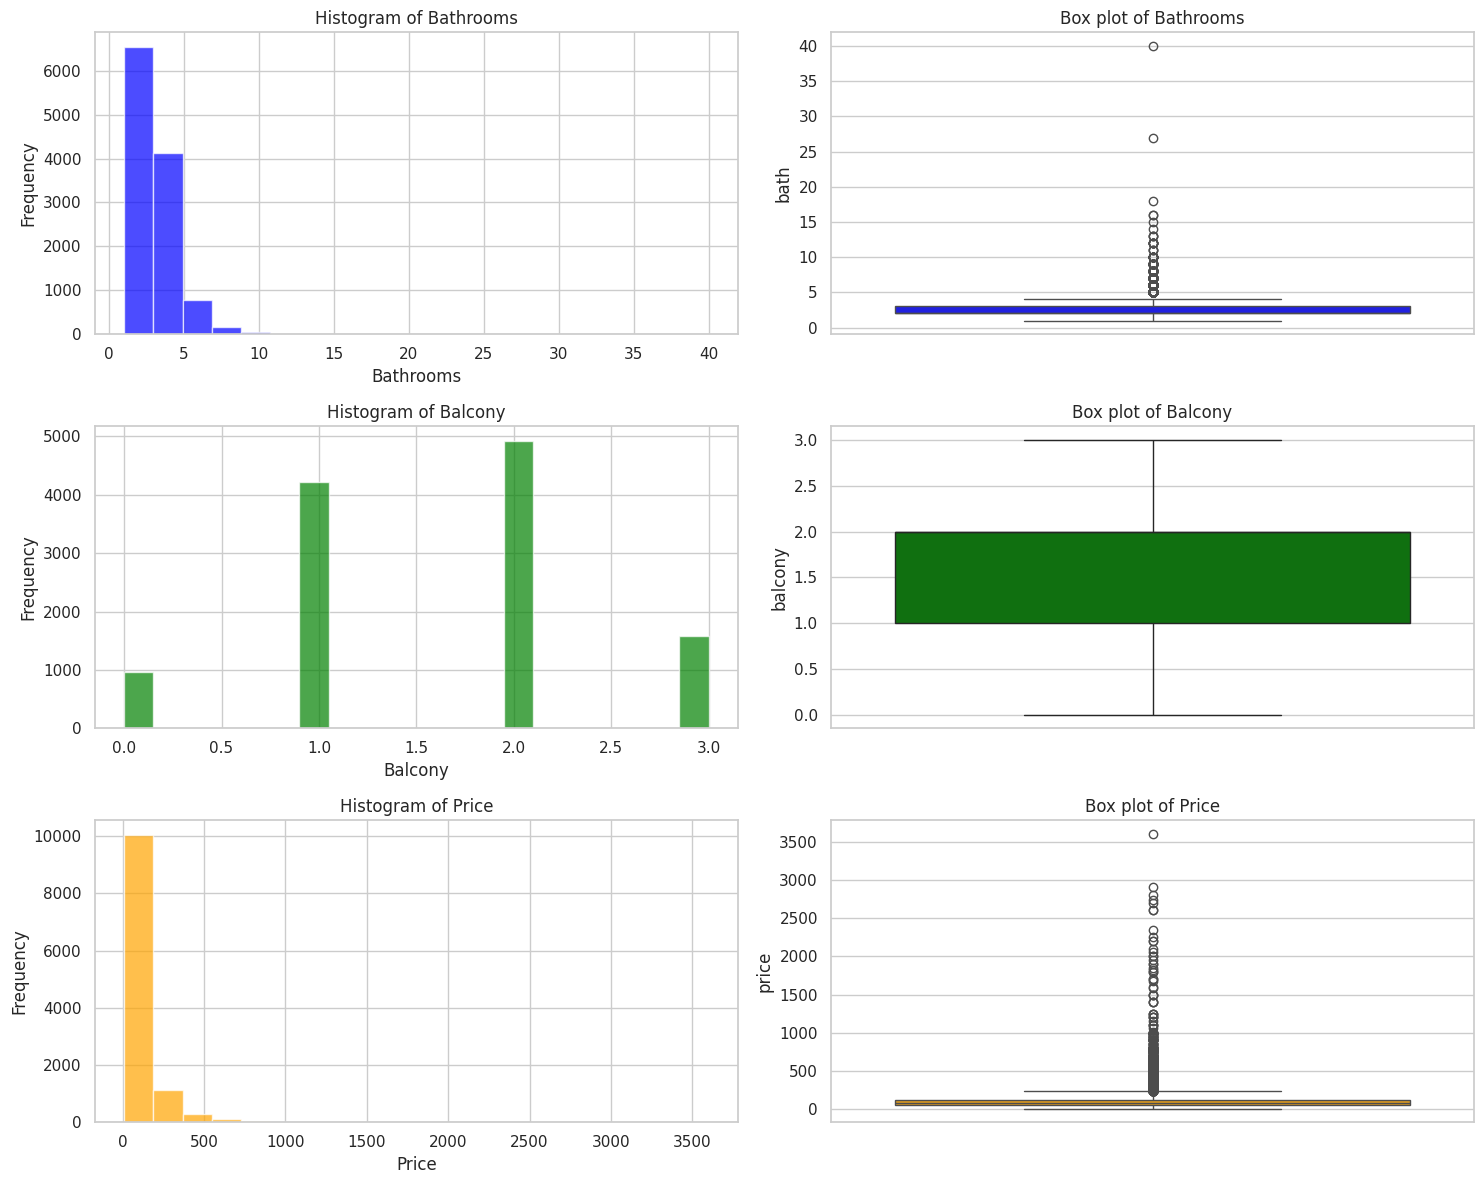

In [27]:
import matplotlib.pyplot as plt

# Create subplots for histograms
plt.figure(figsize=(15, 12))

# Histogram for 'bath'
plt.subplot(3, 2, 1)
plt.hist(df['bath'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Frequency')

# Histogram for 'balcony'
plt.subplot(3, 2, 3)
plt.hist(df['balcony'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of Balcony')
plt.xlabel('Balcony')
plt.ylabel('Frequency')

# Histogram for 'price'
plt.subplot(3, 2, 5)
plt.hist(df['price'], bins=20, color='orange', alpha=0.7)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Box plot for 'bath'
plt.subplot(3, 2, 2)
sns.boxplot(y='bath', data=df, color='blue')
plt.title('Box plot of Bathrooms')

# Box plot for 'balcony'
plt.subplot(3, 2, 4)
sns.boxplot(y='balcony', data=df, color='green')
plt.title('Box plot of Balcony')

# Box plot for 'price'
plt.subplot(3, 2, 6)
sns.boxplot(y='price', data=df, color='orange')
plt.title('Box plot of Price')

plt.tight_layout()
plt.show()


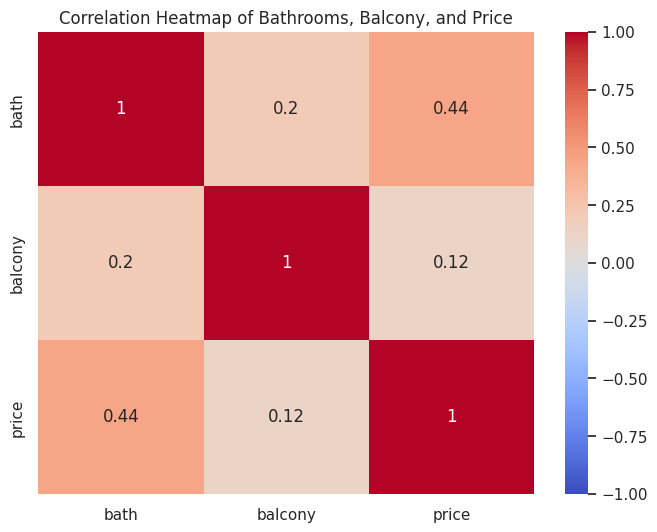

In [28]:
# Compute the correlation matrix
correlation_matrix = df[['bath', 'balcony', 'price']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Bathrooms, Balcony, and Price')
plt.show()


In [29]:
from sklearn.preprocessing import MinMaxScaler

# Select columns to scale (excluding 'price')
columns_to_scale = ['size', 'total_sqft', 'bath', 'balcony','price']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [30]:
# Display the scaled DataFrame
df.head()

,size,total_sqft,bath,balcony,price
0,0.023810,0.020183,0.025641,0.333333,0.008650
1,0.071429,0.049722,0.102564,1.000000,0.031180
2,0.047619,0.027530,0.025641,1.000000,0.015033
3,0.047619,0.029079,0.051282,0.333333,0.024220
4,0.023810,0.022938,0.025641,0.333333,0.011971


In [31]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# Initialize models

# Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Lasso Regression
lasso_reg = Lasso(alpha=0.1)

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)

# AdaBoost Regressor
adaboost_reg = AdaBoostRegressor(random_state=42)

# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Bayesian Ridge Regression
bayesian_reg = BayesianRidge()

# K-Nearest Neighbors Regressor
knn_reg = KNeighborsRegressor()

# ElasticNet Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Support Vector Regression (SVR)
svr = SVR()


In [34]:
# List of models
models = {
    'Random Forest': rf_regressor,
    'Decision Tree': dt_regressor,
    'Lasso Regression': lasso_reg,
    'Ridge Regression': ridge_reg,
    'AdaBoost Regression': adaboost_reg,
    'Gradient Boosting Regression': gb_regressor,
    'Bayesian Ridge Regression': bayesian_reg,
    'K-Nearest Neighbors Regression': knn_reg,
    'ElasticNet Regression': elastic_net,
    'Support Vector Regression': svr
}

# Dictionary to store results
results = {'Model': [], 'MSE': [], 'R2': []}

# Train, predict, and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R2'].append(r2)
    print(f"{name} Metrics:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")
    print("--------------------")

# Convert results to DataFrame
results_df = pd.DataFrame(results)


Training Random Forest...
Random Forest Metrics:
Mean Squared Error (MSE): 0.0011908803472652232
R-squared (R2): 0.5242995243768505
--------------------
Training Decision Tree...
Decision Tree Metrics:
Mean Squared Error (MSE): 0.0020284248264154153
R-squared (R2): 0.18974004659032473
--------------------
Training Lasso Regression...
Lasso Regression Metrics:
Mean Squared Error (MSE): 0.0025044833699512034
R-squared (R2): -0.0004228661695435676
--------------------
Training Ridge Regression...
Ridge Regression Metrics:
Mean Squared Error (MSE): 0.0015192417268644353
R-squared (R2): 0.39313465562213
--------------------
Training AdaBoost Regression...
AdaBoost Regression Metrics:
Mean Squared Error (MSE): 0.001285730806904951
R-squared (R2): 0.48641124377224654
--------------------
Training Gradient Boosting Regression...
Gradient Boosting Regression Metrics:
Mean Squared Error (MSE): 0.0010572596181557968
R-squared (R2): 0.5776746972365212
--------------------
Training Bayesian Ridge R

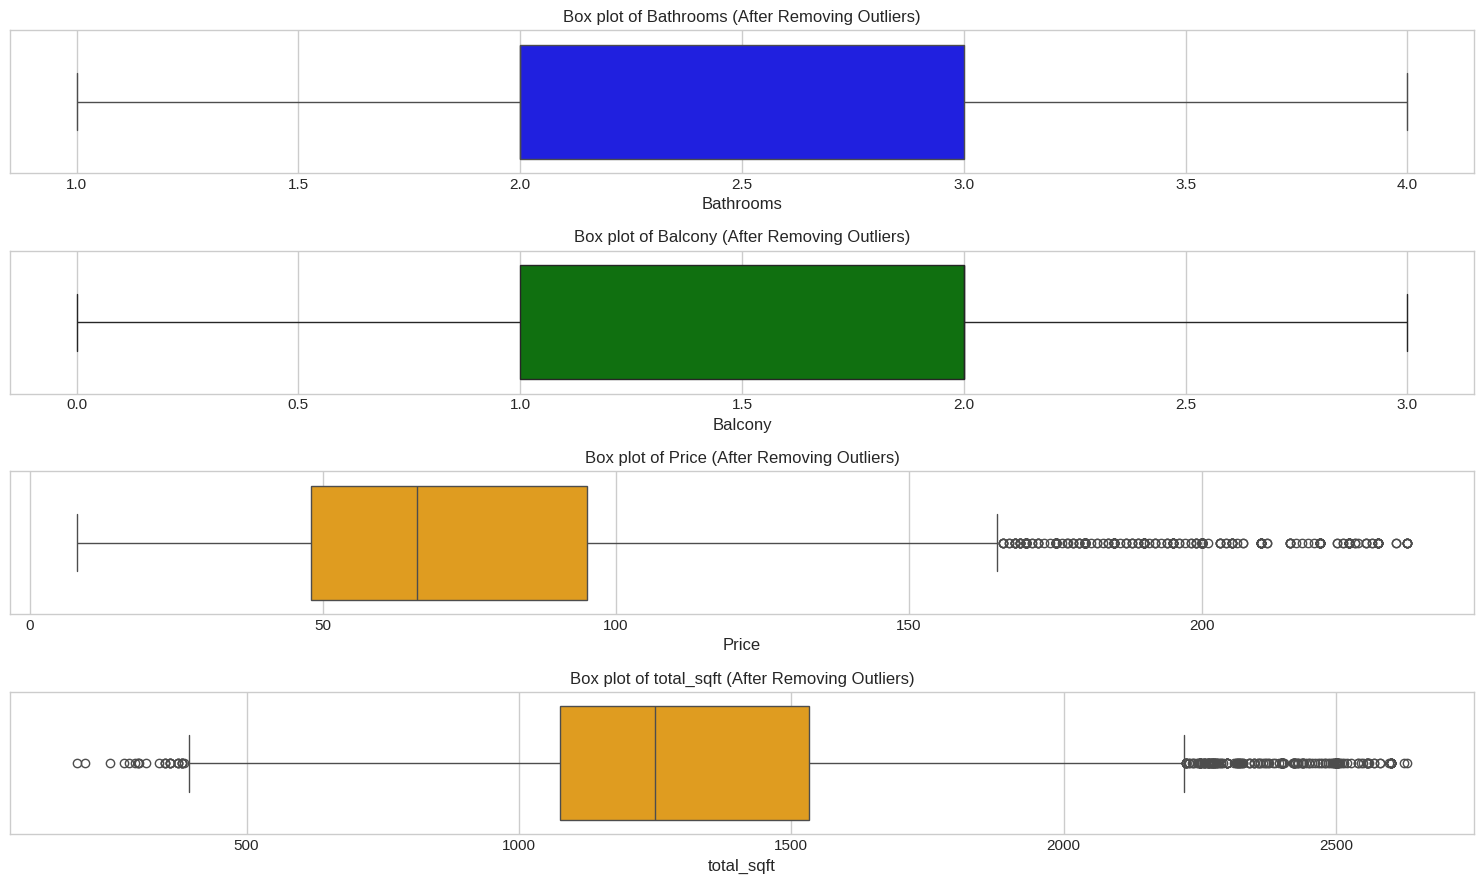

In [35]:

import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Use the updated Seaborn style syntax (works in Colab)
plt.style.use('seaborn-v0_8-whitegrid')

# Create subplots for each variable
plt.figure(figsize=(15, 9))

# Box plot for 'bath' after removing outliers
plt.subplot(4, 1, 1)
sns.boxplot(x='bath', data=df_filtered, color='blue', orient='v')
plt.title('Box plot of Bathrooms (After Removing Outliers)')
plt.xlabel('Bathrooms')

# Box plot for 'balcony' after removing outliers
plt.subplot(4, 1, 2)
sns.boxplot(x='balcony', data=df_filtered, color='green', orient='v')
plt.title('Box plot of Balcony (After Removing Outliers)')
plt.xlabel('Balcony')

# Box plot for 'price' after removing outliers
plt.subplot(4, 1, 3)
sns.boxplot(x='price', data=df_filtered, color='orange', orient='v')
plt.title('Box plot of Price (After Removing Outliers)')
plt.xlabel('Price')

# Box plot for 'total_sqft' after removing outliers
plt.subplot(4, 1, 4)
sns.boxplot(x='total_sqft', data=df_filtered, color='orange', orient='v')
plt.title('Box plot of total_sqft (After Removing Outliers)')
plt.xlabel('total_sqft')

plt.tight_layout()
plt.show()

In [36]:
# Find the best model based on MSE and R2
best_model_mse = results_df.loc[results_df['MSE'].idxmin()]
best_model_r2 = results_df.loc[results_df['R2'].idxmax()]

print("\nBest Model based on MSE:")
print(best_model_mse)

print("\nBest Model based on R2:")
print(best_model_r2)


Best Model based on MSE:
Model    K-Nearest Neighbors Regression
MSE                            0.000976
R2                             0.610333
Name: 7, dtype: object

Best Model based on R2:
Model    K-Nearest Neighbors Regression
MSE                            0.000976
R2                             0.610333
Name: 7, dtype: object
